In [20]:
#https://www.kaggle.com/c/titanic
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.cross_validation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


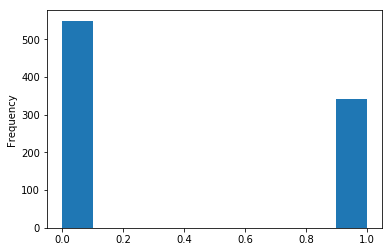

In [6]:
df.Survived.plot.hist()

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.shape

(891, 12)

In [11]:
permissing = (df.isnull().sum() / len(df)) * 100
nadata = permissing.drop(permissing[permissing == 0].index).sort_values(ascending=False)[:30]
nullvalues = pd.DataFrame({'Missing Ratio' :nadata})
print(nullvalues)

          Missing Ratio
Cabin         77.104377
Age           19.865320
Embarked       0.224467


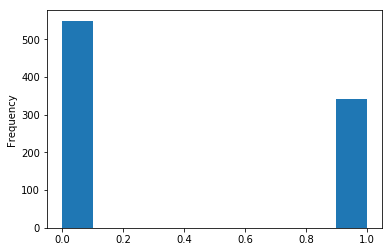

In [12]:
df.Survived.plot.hist()

In [14]:
df.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

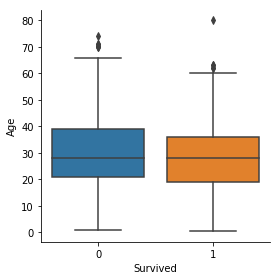

In [24]:
sns.factorplot(kind='box',        
               y='Age',   
               x='Survived',       
               data=df,      
               legend_out=False)  

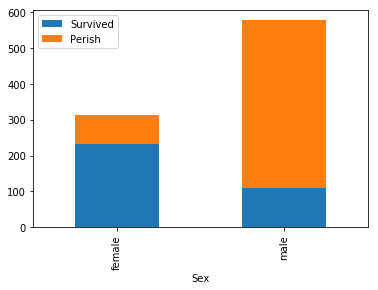

In [39]:
df['Perish'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Perish']].plot(kind='bar', stacked=True);

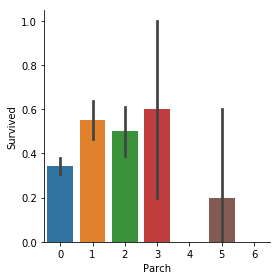

In [57]:
graph = sns.factorplot(x="Parch",y="Survived",data=df,kind="bar")

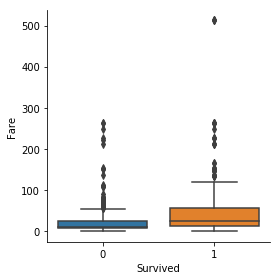

In [40]:
sns.factorplot(kind='box',        
               y='Fare',   
               x='Survived',       
               data=df,      
               legend_out=False)  

In [31]:
df.drop('Cabin', axis=1, inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
df['Ticket 1'] = df['Ticket'].apply (lambda x: x.split(' ')[0])
df['Ticket 1'] = df['Ticket 1'].apply (lambda x: "U" if x.isdigit() else x)
df["Ticket 1"]  = df["Ticket 1"].apply(lambda x: x.replace(".", ""))
df["Ticket 1"]  = df["Ticket 1"].replace("/", "")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fail,Perish,Ticket 1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,STON/O2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,U
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,U


In [43]:
df['Title'] = df["Name"].map(lambda x: x.split(',')[1].split('.')[0].strip())
print(df.groupby("Title").count())

              PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  \
Title                                                                       
Capt                    1         1       1     1    1    1      1      1   
Col                     2         2       2     2    2    2      2      2   
Don                     1         1       1     1    1    1      1      1   
Dr                      7         7       7     7    7    6      7      7   
Jonkheer                1         1       1     1    1    1      1      1   
Lady                    1         1       1     1    1    1      1      1   
Major                   2         2       2     2    2    2      2      2   
Master                 40        40      40    40   40   36     40     40   
Miss                  182       182     182   182  182  146    182    182   
Mlle                    2         2       2     2    2    2      2      2   
Mme                     1         1       1     1    1    1      1      1   

In [44]:
replace = ["the Countess", "Ms", "Lady", "Mlle"]
for i in replace:
    print(i)
    df["Title"]  = df["Title"].replace(i, "Miss")

the Countess
Ms
Lady
Mlle


In [45]:
replace2=["Mme", "Sir", "Capt", "Col", "Don", "Major", "Jonkheer"]
for i in replace2:
    df["Title"]  = df["Title"].replace(i, "Mr")

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fail,Perish,Ticket 1,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,A/5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,PC,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,STON/O2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,U,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,U,Mr


In [47]:
df.drop(['Fail', 'Perish'], axis=1, inplace=True)

In [48]:
mean = df['Age'].mean()
stdev = df["Age"].std()
import random
df["Age"] = df["Age"].fillna(random.randint(int(round(mean-stdev,0)), int(round(mean+stdev,0))))

In [50]:
dfclean = pd.get_dummies(data=df, columns=['Sex', 'Embarked', 'Ticket 1', 'Title'])

In [51]:
dfclean.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,...,Ticket 1_U,Ticket 1_W/C,Ticket 1_WE/P,Ticket 1_WEP,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,...,1,0,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,...,1,0,0,0,0,0,0,1,0,0


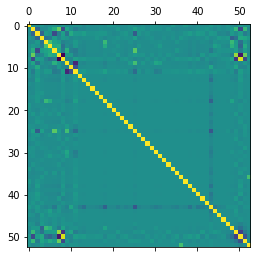

In [52]:
plt.matshow(dfclean.corr())

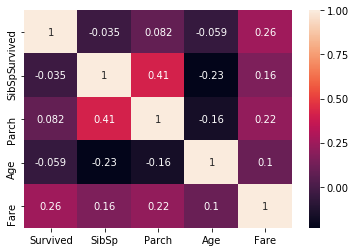

In [55]:
sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True)

In [72]:
import sklearn.linear_model as sklm 
import sklearn.decomposition as skdc 
import sklearn.pipeline as skpl 
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model, decomposition
from sklearn.metrics import accuracy_score

y= dfclean['Survived']
X=dfclean[[e for e in (list(dfclean.columns.values)) if e not in ("Survived", "PassengerId", "Ticket 1", "Name", "Ticket", "Ticket2", 'Embarked', 'Cabin')]]
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X,y)
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.set_index('feature', inplace=True)
features.sort_values(by=['importance'], ascending=True, inplace=True)

In [73]:
print(features)

                   importance
feature                      
Ticket 1_SP          0.000019
Ticket 1_Fa          0.000030
Ticket 1_A/S         0.000040
Ticket 1_A4          0.000043
Ticket 1_SC/A4       0.000052
Ticket 1_SCO/W       0.000056
Ticket 1_SOP         0.000070
Ticket 1_CA/SOTON    0.000108
Ticket 1_WEP         0.000144
Ticket 1_SO/C        0.000144
Ticket 1_SC/AH       0.000145
Ticket 1_A5          0.000187
Ticket 1_SC          0.000209
Ticket 1_P/PP        0.000249
Ticket 1_SOTON/O2    0.000269
Ticket 1_FC          0.000331
Ticket 1_WE/P        0.000410
Ticket 1_SC/Paris    0.000497
Ticket 1_A/4         0.000606
Ticket 1_PP          0.000744
Ticket 1_SOC         0.000919
Ticket 1_FCC         0.000980
Ticket 1_LINE        0.001260
Ticket 1_SC/PARIS    0.001378
Ticket 1_STON/O2     0.001504
Ticket 1_C           0.001569
Title_Dr             0.001826
Ticket 1_SO/PP       0.002210
Ticket 1_SOTON/OQ    0.002266
Title_Rev            0.002850
Ticket 1_W/C         0.004366
Ticket 1_A

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size= 0.8)

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', LogisticRegression())])
pcafit = pca.fit_transform(X,y)
pca.fit(Xtrain)
n_components = [10,20, 40, 46]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(Xtrain, ytrain)
y_pred_sepal = estimator.predict(Xtest)
score = accuracy_score(ytest, y_pred_sepal)
print(score)

0.8268156424581006
